<a href="https://colab.research.google.com/github/nprasad2021/google_ncaa/blob/master/exploratory_ncaa_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


Query 1: Extract Information for D1 vs. D1 games

In [33]:
%%bigquery --project stardust-hackathon df

# Produces current season stats for D1 v D1 games only
# Filtering on period 0 gives your full game stats

SELECT
  tbt.season,
  tbt.team_code,
  MAX(team.school) AS team_name,
  COUNT(tbt.team_code) AS games,
  MAX(game_date) AS through_game_date,
  ROUND(AVG(points),1) AS ppg,
  ROUND(AVG(fga), 1) AS fga_avg,
  ROUND(AVG(fgm), 1) AS fgm_avg,
  ROUND(AVG(fga3), 1) AS fga3_avg,
  ROUND(AVG(fgm3), 1) AS fgm3_avg,
  ROUND(AVG(fta), 1) AS fta_avg,
  ROUND(AVG(ftm), 1) AS ftm_avg,
  SUM(tbt.win) as num_wins
FROM
  `stardust-hackathon:ncaa_mbb.team_box` AS tbt
JOIN
  `stardust-hackathon:ncaa_mbb.team_info` AS team
ON
  team.team_code = tbt.team_code
JOIN
  `stardust-hackathon:ncaa_mbb.team_info` AS opp
ON
  tbt.opp_code = opp.team_code
WHERE
  tbt.season = 2018
  AND team.division = 1
  AND opp.division = 1
  AND period = 0
GROUP BY
  season,
  team_code
ORDER BY
  num_wins DESC

,season,team_code,team_name,games,through_game_date,ppg,fga_avg,fgm_avg,fga3_avg,fgm3_avg,fta_avg,ftm_avg,num_wins
0,2018,288,Houston,500,2019-01-23,75.6,59.6,26.2,26.0,9.1,19.3,14.1,475
1,2018,416,Michigan St.,500,2019-01-24,83.8,59.6,29.8,22.2,8.6,21.2,15.6,450
2,2018,418,Michigan,475,2019-01-22,71.8,57.0,26.2,21.5,7.5,17.9,11.9,450
3,2018,466,Nevada,455,2019-01-23,80.6,59.0,27.5,25.7,8.8,23.5,16.8,430
4,2018,746,Virginia,450,2019-01-22,73.7,54.3,25.9,20.9,8.2,17.6,13.6,425
5,2018,140,Cincinnati,500,2019-01-24,75.3,57.5,26.5,18.4,6.5,22.3,15.9,425
6,2018,283,Hofstra,500,2019-01-24,81.3,57.5,28.0,21.7,8.5,21.2,17.0,425
7,2018,387,Marquette,500,2019-01-23,79.3,58.6,26.7,24.0,9.3,21.5,16.6,425
8,2018,260,Gonzaga,455,2019-01-19,90.9,61.8,32.4,23.6,8.7,23.0,17.4,405
9,2018,694,Tennessee,425,2019-01-23,86.2,60.1,30.4,19.1,6.8,24.1,18.7,400


Experiment 1: Observe teams that are

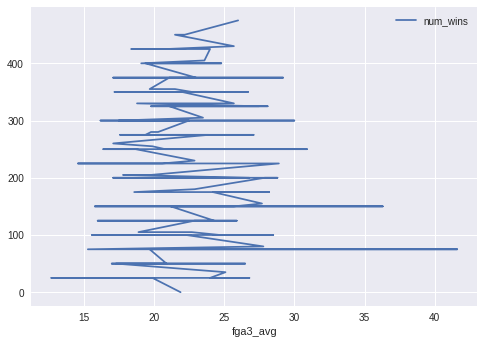

In [34]:
df['rank'] = df.index +1
team_rank = {code: rank for  code, rank in zip(df.team_code, df['rank'])}
df.plot(x='fga3_avg', y='num_wins')

In [38]:
%%bigquery --project stardust-hackathon dft

# Produces current season stats for D1 v D1 games only
# Filtering on period 0 gives your full game stats

SELECT
  tbt.season,
  tbt.game_id,
  tbt.team_code,
  tbt.opp_code,
  tbt.win,
  tbt.is_home,
  tbt.vh,
  tbt.game_date,
  tbt.is_neutral,
  tbt.venue_neutralgame,
  tbt.period,
  tbt.minutes,
  tbt.points,
  tbt.ast,
  tbt.blk,
  tbt.dreb,
  tbt.oreb,
  tbt.treb,
  tbt.fga,
  tbt.fga3,
  tbt.fgm,
  tbt.fgm3,
  tbt.fta,
  tbt.ftm,
  tbt.pf,
  tbt.stl,
  tbt.tf,
  tbt.tov,
  tbt.opp_points,
  tbt.opp_ast,
  tbt.opp_blk,
  tbt.opp_dreb,
  tbt.opp_oreb,
  tbt.opp_treb,
  tbt.opp_fga,
  tbt.opp_fga3,
  tbt.opp_fgm,
  tbt.opp_fgm3,
  tbt.opp_fta,
  tbt.opp_ftm,
  tbt.opp_pf,
  tbt.opp_stl,
  tbt.opp_tf,
  tbt.opp_tov
FROM
  `stardust-hackathon:ncaa_mbb.team_box` AS tbt
JOIN
  `stardust-hackathon:ncaa_mbb.team_info` AS team
ON
  team.team_code = tbt.team_code
JOIN
  `stardust-hackathon:ncaa_mbb.team_info` AS opp
ON
  tbt.opp_code = opp.team_code
WHERE
  tbt.season = 2018
  AND team.division = 1
  AND opp.division = 1
  AND period = 0

,season,game_id,team_code,opp_code,win,is_home,vh,game_date,is_neutral,venue_neutralgame,...,opp_fga,opp_fga3,opp_fgm,opp_fgm3,opp_fta,opp_ftm,opp_pf,opp_stl,opp_tf,opp_tov
0,2018,416-692-2018-11-18,416,692,1,1,H,2018-11-18,0,N,...,51,10,15,1,9,2,22,6,0,19
1,2018,416-692-2018-11-18,416,692,1,1,H,2018-11-18,0,N,...,51,10,15,1,9,2,22,6,0,19
2,2018,416-692-2018-11-18,416,692,1,1,H,2018-11-18,0,N,...,51,10,15,1,9,2,22,6,0,19
3,2018,416-692-2018-11-18,416,692,1,1,H,2018-11-18,0,N,...,51,10,15,1,9,2,22,6,0,19
4,2018,416-692-2018-11-18,416,692,1,1,H,2018-11-18,0,N,...,51,10,15,1,9,2,22,6,0,19
5,2018,416-692-2018-11-18,416,692,1,1,H,2018-11-18,0,N,...,51,10,15,1,9,2,22,6,0,19
6,2018,416-692-2018-11-18,416,692,1,1,H,2018-11-18,0,N,...,51,10,15,1,9,2,22,6,0,19
7,2018,416-692-2018-11-18,416,692,1,1,H,2018-11-18,0,N,...,51,10,15,1,9,2,22,6,0,19
8,2018,416-692-2018-11-18,416,692,1,1,H,2018-11-18,0,N,...,51,10,15,1,9,2,22,6,0,19
9,2018,416-692-2018-11-18,416,692,1,1,H,2018-11-18,0,N,...,51,10,15,1,9,2,22,6,0,19


In [40]:
dft.columns

Index(['season', 'game_id', 'team_code', 'opp_code', 'win', 'is_home', 'vh',
       'game_date', 'is_neutral', 'venue_neutralgame', 'period', 'minutes',
       'points', 'ast', 'blk', 'dreb', 'oreb', 'treb', 'fga', 'fga3', 'fgm',
       'fgm3', 'fta', 'ftm', 'pf', 'stl', 'tf', 'tov', 'opp_points', 'opp_ast',
       'opp_blk', 'opp_dreb', 'opp_oreb', 'opp_treb', 'opp_fga', 'opp_fga3',
       'opp_fgm', 'opp_fgm3', 'opp_fta', 'opp_ftm', 'opp_pf', 'opp_stl',
       'opp_tf', 'opp_tov'],
      dtype='object')

In [0]:
diff = 10
eps = 5

home_ranks = list(map(lambda x: team_rank[x], dft.team_code))
opp_rank = list(map(lambda x: team_rank[x], dft.opp_code))

under_ranks = list(map(lambda x: x[0] - x[1] >= diff + eps, zip(home_ranks, opp_rank)))
over_ranks = list(map(lambda x: (x[0] - x[1] <= diff - eps) and (x[0] - x[1] >= 0), zip(home_ranks, opp_rank)))

underdog = dft[under_ranks]
similar = dft[over_ranks]

In [62]:
print("Win Percentage of Underdogs:", int(1000*sum(underdog.win)/len(underdog))/10, "%")
print("Win Percentage of Similar:", int(1000*sum(similar.win)/len(similar))/10, "%")

Win Percentage of Underdogs: 20.3 %
Win Percentage of Similar: 36.5 %


In [63]:
underdog.head()

,season,game_id,team_code,opp_code,win,is_home,vh,game_date,is_neutral,venue_neutralgame,...,opp_fga,opp_fga3,opp_fgm,opp_fgm3,opp_fta,opp_ftm,opp_pf,opp_stl,opp_tf,opp_tov
75,2018,669-371-2019-1-23,669,371,1,1,H,2019-01-23,0,N,...,35,10,12,2,11,9,13,7,0,14
76,2018,669-371-2019-1-23,669,371,1,1,H,2019-01-23,0,N,...,35,10,12,2,11,9,13,7,0,14
77,2018,669-371-2019-1-23,669,371,1,1,H,2019-01-23,0,N,...,35,10,12,2,11,9,13,7,0,14
78,2018,669-371-2019-1-23,669,371,1,1,H,2019-01-23,0,N,...,35,10,12,2,11,9,13,7,0,14
79,2018,669-371-2019-1-23,669,371,1,1,H,2019-01-23,0,N,...,35,10,12,2,11,9,13,7,0,14


In [76]:
rel_columns = ['points', 'ast', 'blk', 'dreb', 'oreb', 'treb', 'fga', 'fga3', 'fgm',
       'fgm3', 'fta', 'ftm', 'pf', 'stl', 'tf', 'tov', 'opp_points', 'opp_ast',
       'opp_blk', 'opp_dreb', 'opp_oreb', 'opp_treb', 'opp_fga', 'opp_fga3',
       'opp_fgm', 'opp_fgm3', 'opp_fta', 'opp_ftm', 'opp_pf', 'opp_stl',
       'opp_tf', 'opp_tov']

for col in rel_columns:
  u = int(10*sum(underdog[col])/len(underdog[col]))/10
  if "opp" in col:
    continue
  opp_col = "opp_" + col
  s = int(10*(sum(similar[col]) + sum(similar[opp_col]))/(len(similar[opp_col]) + len(similar[col])))/10
  print(col, "underdog:", u, "similar:", s, "difference:", (s-u)/u)

points underdog: 67.5 similar: 73.1 difference: 0.08296296296296288
ast underdog: 11.9 similar: 13.3 difference: 0.11764705882352944
blk underdog: 2.8 similar: 3.4 difference: 0.21428571428571433
dreb underdog: 23.7 similar: 24.6 difference: 0.03797468354430389
oreb underdog: 9.9 similar: 10.0 difference: 0.010101010101010065
treb underdog: 33.6 similar: 34.7 difference: 0.03273809523809528
fga underdog: 57.6 similar: 57.3 difference: -0.005208333333333408
fga3 underdog: 22.2 similar: 21.9 difference: -0.013513513513513545
fgm underdog: 23.9 similar: 25.5 difference: 0.06694560669456073
fgm3 underdog: 7.1 similar: 7.7 difference: 0.08450704225352121
fta underdog: 18.0 similar: 20.5 difference: 0.1388888888888889
ftm underdog: 12.4 similar: 14.2 difference: 0.14516129032258054
pf underdog: 19.0 similar: 18.7 difference: -0.015789473684210565
stl underdog: 5.8 similar: 5.8 difference: 0.0
tf underdog: 0.1 similar: 0.1 difference: 0.0
tov underdog: 14.1 similar: 13.0 difference: -0.078014